# Introducción a la Visualización en Python

> Francisco Palm

Visualizar es mucho más que hacer dibujitos, usualmente despreciada en los entornos académicos ya que es vista como relleno en los documentos, es una herramienta de valor indiscutible en el ejercicio profesional para comunicar resultados e generar intercambios entre puntos de vista.

En el marco de la ciencia de datos nos interesamos obviamente en la visualización de datos, aunque escalando en la llamada [pirámide del conocimiento](https://en.wikipedia.org/wiki/DIKW_pyramid) nos interesa igualmente la visualización de la información y del conocimiento.

![Pirámide del Conocimiento](https://lh3.google.com/u/3/d/1npWKCbf7dN-xKqh3FRbnNLelEMp2u9BW=w1366-h595-iv1)

Aunque parece no haber tal cosa como la visualización de la sabiduría, todo indica que surge de la interacción entre la visualización y el observador.

Es especialmente notable la crítica que hace Edward Tufte del uso de presentaciones de PowerPoint en general, y del uso en particular que se le dio en la NASA como [uno de los factores que provocaron el accidente del Transbordador Espacial Columbia](http://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=0001yB&topic_id=1), donde una muy importante acotación se perdió dentro de una lámina plagada de texto.

El presente cuaderno de Jupter no realiza una explicación detallada de los conceptos y los elementos técnicos involucrados. En realidad, tiene como finalidad servir de motivación y generar expectativas para las personas que desean adentrarse en el ámbito de la visualización. Tampoco se pretende dar una revisión amplia de las herramientas de visualización disponibles en Python, que son muchas, y tampoco de todos los tipos de gráficos disponibles, la estrategia consiste en realizar un recorrido en base a un estudio de caso que sirva de demostración.



## Preparemos el escenario

La intención será mostrar los conceptos a través de ejemplos con código, si algunos dicen que una imagen vale más que mil palabras en contra de la opinión de Sartori, podemos afirmar que un ejemplo vale generalmente más que una definición, y si además viene acompañado de código fuente, ¡mucho mejor!.

Empecemos introduciendo al entorno los sospechosos habituales de cualquier cuaderno de jupyter para ciencia de datos:

In [1]:
from pathlib import Path

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Solamente recordemos que:

* `numpy` implementa arreglos numéricos optimizados.
* `pandas` implementa dataframes, tablas de datos indexadas formadas por series de datos de un mismo tipo. Funciona en base a `numpy`.
* `matplotlib` es una herramienta *clásica* para graficación en Python.
* `seaborn` es una herramienta de gráficos de alto nivel para estadística, basada en `matplotlib`.

Y que no falte:

In [3]:
%matplotlib inline
sns.set_style("whitegrid")

Pensando en utilizar un conjunto de datos divertido, sin caer en el ya trillado [iris](https://en.wikipedia.org/wiki/Iris_flower_data_set), usemos un conjunto de datos relativamente pequeño que se ha hecho muy popular en Kaggle: [Pokemon- Weedle's Cave](https://www.kaggle.com/terminus7/pokemon-challenge).

Este conjunto contiene dos archivos: `pokemon.csv` con estadísticas de los pokemons hasta la sexta generación y `combats.csv` con los resultados de cincuenta mil batallas. No se pongan quisquillosos, sabemos que cada tipo de pokemon aparece con un valor fijo en sus estadísticas, que no se considera el estado inicial del pokemon en el combate y otros elementos de una batalla pokemon real, como la relación con su entrenador.

![Pokemon Logo](https://lh3.google.com/u/3/d/1MUhLvLWt_ODcHHgFup3knSNy0xyGfeFQ=w758-h583-iv1)

Asumamos que todas son batallas individuales y que los pokemon son utilizados con sus estadísticas base.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
DATA_DIR = Path.cwd() / "drive/MyDrive/fpalm/data"
DATA_DIR

PosixPath('/content/drive/MyDrive/fpalm/data')

In [6]:
pokemon = pd.read_csv(f"{DATA_DIR / 'pokemon_challenge/pokemon.csv'}", index_col="#")
combats = pd.read_csv(f"{DATA_DIR / 'pokemon_challenge/combats.csv'}")

> Nótese que establecemos el número de pokemon como índice.

Siempre es conveniente verificar si los datos fueron leídos correctamente y tomar nota de sus campos, tipos de datos y rangos de valores.

In [7]:
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [8]:
pokemon.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 800
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        799 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.5+ KB


In [9]:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [10]:
combats.describe()

,First_pokemon,Second_pokemon,Winner
count,50000.000000,50000.000000,50000.000000
mean,400.495640,403.159660,408.890100
std,229.549429,230.083644,231.159961
min,1.000000,1.000000,1.000000
25%,203.000000,207.000000,206.000000
50%,399.000000,402.000000,422.000000
75%,597.250000,602.000000,606.000000
max,800.000000,800.000000,800.000000


In [ ]:
combats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   First_pokemon   50000 non-null  int64
 1   Second_pokemon  50000 non-null  int64
 2   Winner          50000 non-null  int64
dtypes: int64(3)
memory usage: 1.1 MB


## La narrativa de los datos

Uno de los aspectos fundamentales de la visualización es *dejar que los datos nos cuenten una historia*. El conjunto de datos está diseñado para intentar predecir los resultados de un combate partir de las características de los tipos de pokemons involucrados y los resultados almacenados.

Pero hay muchas cosas que nos pueden interesar, comparar los pokemons de distintos tipos, estudiar las relaciones entre sus características, y realizar comparaciones a lo largo de las distintas generaciones. Podemos relacionar los factores anteriores con su porcentaje de victorias en el registro histórico de combates.

En general, vamos a:

1. Indagar en los *criterios de los diseñadores del videojuego para mantener el balance y el interés*.
2. Todo esto con un objetivo adicional: demostrar los tipos fundamentales de gráficos que podemos generar con las herramientas básicas de Python.

### Comparación entre categorías

Empecemos por un poco de demografía del universo pokemon, ¿cuáles son los tipos de Pokemon que tienen la mayor variedad de especies conocidas?. Simplemente contemos cuantas veces se repite cada tipo de Pokemon y hagamos un gráfico de barras.

Para poner colores acordes a los distintos tipos de pokemons utilicemos una paleta de colores adecuada, cortesía de la [Bulbapedia](https://bulbapedia.bulbagarden.net):

In [11]:
pk_colors = [
    "#A8B820",  # Bug,
    "#705848",  # Dark,
    "#7038F8",  # Dragon
    "#F8D030",  # Electric
    "#EE99AC",  # Fairy
    "#C03028",  # Fighting
    "#F08030",  # Fire
    "#A890F0",  # Flying
    "#705898",  # Ghost
    "#78C850",  # Grass
    "#E0C068",  # Ground
    "#98D8D8",  # Ice
    "#A8A878",  # Normal
    "#A040A0",  # Poison
    "#F85888",  # Psychic
    "#B8A038",  # Rock
    "#B8B8D0",  # Steel
    "#6890F0",  # Water
]


¡Vamos con nuestro primer gráfico!, un gráfico de barras horizontales que sirve para comparar el número de especies conocidas hasta la generación 6 para cada tipo de Pokemon.

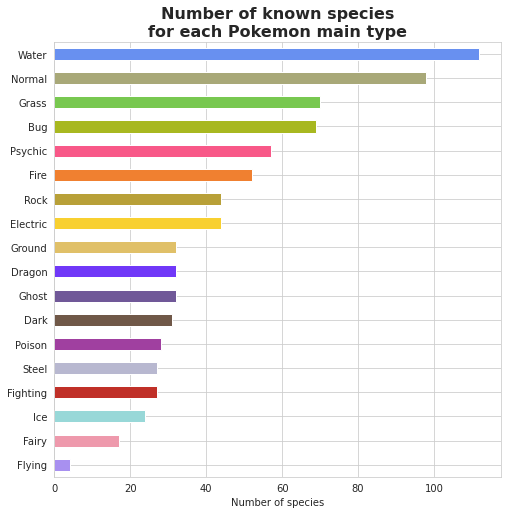

In [12]:
pkt_cnt = pokemon["Type 1"].value_counts(sort=False).sort_index()
pkt_cnt = pd.concat(
    [pkt_cnt, pd.DataFrame(pk_colors, index=pkt_cnt.index, columns=["Colors"])], axis=1
)
pkt_cnt.sort_values("Type 1", inplace=True)
pkt_cnt_bar = pkt_cnt.plot(
    kind="barh", y="Type 1", color=pkt_cnt.Colors, legend=False, figsize=(8, 8)
)
pkt_cnt_bar.set_title(
    "Number of known species\nfor each Pokemon main type", fontsize=16, weight="bold"
)
pkt_cnt_bar.set_xlabel("Number of species")
plt.show()

> Para el gráfico anterios se realiza un conteo del número de especies por cada tipo usando el método `value_counts()` y se reordena por el índice para que coincida con la paleta de colores. En la línea 2 se añade la paleta como una columna del dataframe para que se reordene con el dataframe.

Esta información no es nada nueva para los fanáticos de la serie, los tipos de Pokemon con el mayor número de especies son "Agua", "Normal" y "Planta". Curiosamente el "Agua" es más normal que "Normal". Los que tienen como tipo principal "Volador" son los más escasos.

Entonces, ¿queremos comparar entre los distintos tipos de pokemon?. Empecemos por definir un data frame donde podamos compararlos. Para esto utilicemos el método [`pivot_table()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) de pandas:

In [14]:
pkt = pokemon.pivot_table(
    index="Type 1",
    values=["Attack", "Defense", "HP", "Sp. Atk", "Sp. Def", "Speed"],
    aggfunc="mean",
)
pkt.head()

,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,
Bug,70.971014,70.724638,56.884058,53.869565,64.797101,61.681159
Dark,88.387097,70.225806,66.806452,74.645161,69.516129,76.161290
Dragon,112.125000,86.375000,83.312500,96.843750,88.843750,83.031250
Electric,69.090909,66.295455,59.795455,90.022727,73.704545,84.500000
Fairy,61.529412,65.705882,74.117647,78.529412,84.705882,48.588235


Como vemos, gracias a `pivot_table()` tenemos ahora una tabla con los valores promedio de las variables de interés por tipo de pokemon. Recordemos que un DataFrame, ya sea en Pandas o R, es una suerte de hoja de cálculo virtual a la que se aplican métodos que usualmente se encuentran en aplicaciones como MS Excel o LibreOffice Calc.

In [15]:
pkt["Total_Power"] = pkt.iloc[:,range(6)].sum(axis=1)
pkt["Color"] = pk_colors

pkt.head()

,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed,Total_Power,Color
Type 1,,,,,,,,
Bug,70.971014,70.724638,56.884058,53.869565,64.797101,61.681159,378.927536,#A8B820
Dark,88.387097,70.225806,66.806452,74.645161,69.516129,76.161290,445.741935,#705848
Dragon,112.125000,86.375000,83.312500,96.843750,88.843750,83.031250,550.531250,#7038F8
Electric,69.090909,66.295455,59.795455,90.022727,73.704545,84.500000,443.409091,#F8D030
Fairy,61.529412,65.705882,74.117647,78.529412,84.705882,48.588235,413.176471,#EE99AC


Para comparar el poder total medio de los distintos tipos de Pokemons podemos generar un gráfico similar al anterior:

Text(0.5, 1.0, 'Mean Total Power for each Pokemon Main Type')

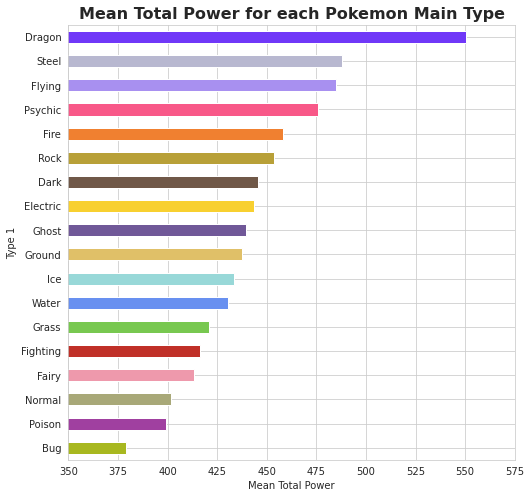

In [16]:
pkt.sort_values("Total_Power", ascending=True, inplace=True)
pkt_bar = pkt.plot(
    kind="barh", y="Total_Power", figsize=(8, 8), color=pkt.Color, legend=False
)
pkt_bar.set_xlim((350, 575))
pkt_bar.set_xlabel("Mean Total Power")
pkt_bar.set_title(
    "Mean Total Power for each Pokemon Main Type", fontsize=16, weight="bold"
)

> Ordenar las barras es bastante útil porque facilita la comparación de valores y apreciar las diferencias por mínimas que sean. La disposición horizontal es conveniente en este caso para facilitar la colocación de las etiquetas para cada columna.

De aquí se puede ver que con diferencia los pokemon tipo Dragón tienen en promedio el mayor poder total, y los pokemon tipo Bicho los que menos. Es de esperar ya que los pokemon de tipo Dragón son unos de los que tienen la mayor proporción de pokemon legendarios como podremos ver a continuación.

### Relación de una parte en el total

¿Qué proporción de los pokemon son legendarios?, ¿qué tan frecuentes son?, ¿qué tan frecuentes de acuerdo al tipo de Pokemon?. Empecemos construyendo una tabla pivote similar al caso anterior pero en base a la columna `Legendary`. Y a continuación contamos el total de Pokemons legendarios por cada tipo de Pokemon, y que fracción representan del total.

In [17]:
pkl = pokemon.pivot_table(index="Type 1", values=["Legendary"], aggfunc="sum")
pkl.sort_index()
pkl.Legendary = pkl.Legendary.astype(int)
pkl["Total"] = pokemon["Type 1"].value_counts()
pkl["Other"] = pkl.Total - pkl.Legendary
pkl["Ratio"] = pokemon.pivot_table(index="Type 1", values=["Legendary"], aggfunc="mean")
pkl["Percent"] = pkl["Ratio"] * 100
pkl["Color"] = pk_colors
pkl.head()

,Legendary,Total,Other,Ratio,Percent,Color
Type 1,,,,,,
Bug,0,69,69,0.000000,0.000000,#A8B820
Dark,2,31,29,0.064516,6.451613,#705848
Dragon,12,32,20,0.375000,37.500000,#7038F8
Electric,4,44,40,0.090909,9.090909,#F8D030
Fairy,1,17,16,0.058824,5.882353,#EE99AC


Para tener una rápida idea de la proporción de pokemon legendarios dentro del total de pokemons, podemos hacer lo siguiente:


Text(0.5, 1.0, 'Proportion of Legendary Pokemons')

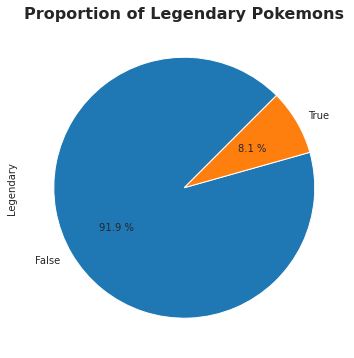

In [18]:
ax = pokemon.Legendary.value_counts().plot.pie(
    startangle=45,
    autopct='%.1f %%',
    figsize=(8, 6)
)
ax.set_title("Proportion of Legendary Pokemons",
             fontsize=16, weight="bold")

> Dos cosas interesantes que notar:
>
> 1. Gracias a la evaluación perezosa podemos encadenar métodos como `Legendary.value_counts().plot.pie()`, y
> 2. El método `plot()` del DataFrame de Pandas se corresponde con el método `plot()` de `matplotlib.pyplot`, por lo que para acceder a la documentación y ejemplos debemos investigar en ambos paquetes. Tal como sugiere la forma de trabajar con matplotlib, podemos obtener el objeto `ax` (de la clase `Axes`) para realizar configuraciones sobre los ejes, en este caso para añadir el título al grafico.

De igual manera, se genera el gráfico que muestre la distribución de los legendarios por tipo de Pokemon.

Empezamos por seleccionar solamente los tipos de pokemon que tienen al menos un legendario, para que no aparezcan las etiquetas correspondientes en el gráfico. Como hemos añadido la paleta de colores como columna esta se modificará junto con los datos.

In [19]:
pkl_notnull = pkl[pkl.Legendary != 0]
pkl_notnull.head()

,Legendary,Total,Other,Ratio,Percent,Color
Type 1,,,,,,
Dark,2,31,29,0.064516,6.451613,#705848
Dragon,12,32,20,0.375000,37.500000,#7038F8
Electric,4,44,40,0.090909,9.090909,#F8D030
Fairy,1,17,16,0.058824,5.882353,#EE99AC
Fire,5,52,47,0.096154,9.615385,#F08030


Text(0.5, 1.0, 'Legendary Proportions by Pokemon Type')

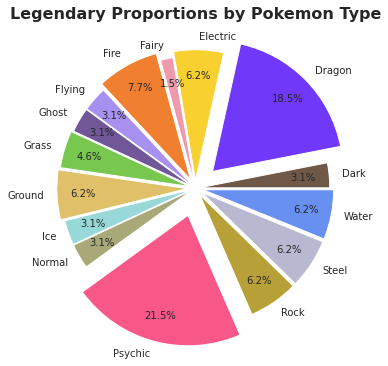

In [20]:
l_total = sum(pkl_notnull.Legendary)
ax = pkl_notnull.Legendary.plot(
    kind="pie",
    label="",
    colors=pkl_notnull.Color,
    autopct="%.1f%%",
    pctdistance=0.8,
    explode=pkl_notnull.Legendary / l_total,
    figsize=(8, 6),
)
ax.set_title("Legendary Proportions by Pokemon Type", fontsize=16, weight="bold")

> En este caso, la amplitud de la "explosión" de cada sector es proporcional a la fracción de pokemon legendarios que pertenecen a cada tipo.

> Se debe asignar `""` al parámetro `label` para que no imprima una etiqueta que colisiona con los etiquetas de los sectores luego de la "explosión". Este tipo de ajustes "finos" con frecuencia son necesarios.

Se puede notar que los tipos Dragon y Psíquico son a los que pertenecen el mayor número de pokemon legendarios. Esto respondería a la pregunta, "dado que un pokemon es legendario qué probabilidad hay de que sea de un tipo determinado".

Ahora bien, si se quiere responder a la pregunta inversa: "dado el tipo de un pokemon qué probabilidad hay que sea legendario", lo que es equivalente a decir ¿qué fracción de especies legendarias hay en cada tipo de Pokemon?

Text(0.5, 0.98, 'Proportion of Legendary for each Pokemon Type')

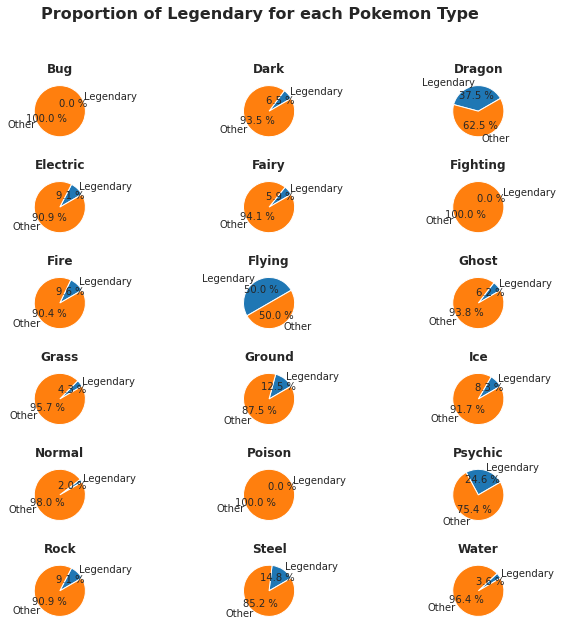

In [ ]:
cols = ["Legendary", "Other"]
fig, axes = plt.subplots(6, 3, figsize=(10, 10))
for i, idx in enumerate(pkl.index):
    ax = axes[i // 3, i % 3]
    ax.pie(pkl[cols].T[idx], labels=cols, startangle=30, autopct="%.1f %%")
    ax.set_title(idx, fontdict={"size": "large", "weight": "bold"})

fig.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle(
    "Proportion of Legendary for each Pokemon Type", fontsize=16, weight="bold"
)

> Matplotlib permite generar este tipo de gráficos múltiples de forma "manual". A través del método subplots obtenemos las referencias a la figura `fig` y a los ejes `axes`. A través de `axes` se controla la ubicación de los gráficos individuales y a través de `fig` los parámetros "internos" del gráfico como la separación entre gráficos. Con la referencia a pyplot `plt` se controlan los parámetros "externos" del gráfico como el título superior.

> Esta forma de trabajar es engorrosa. Los gráficos se van colocando manualmente en el arreglo de subplots, los índices `[i // 3, i % 3]` son un buen ejemplo de por qué los índices de las secuencias de Python (y la mayoría de los lenguajes de programación) comienzan en $0$ y no en $1$. Si el arreglo de subplots tiene 3 columnas, la división entera `i // 3` devuelve la fila y el resto `i % 3` devuelve la columna.

> Como hablamos de responder "la pregunta inversa":  ¿qué fracción de especies legendarias hay en cada tipo de Pokemon?; los gráficos se generan usando la tabla transpuesta `pk_legendary[cols].T[idx]`

Los tipos de Pokemon que cuentan con la mayor proporción de legendarios son los de tipo "Volador" (como tipo principal), seguido de tipo Dragón y tipo Psíquico.

### Mostrando cambios en el tiempo

En el presente conjunto de datos la única referencia temporal que tenemos son las generaciones. Puede ser de interés estudiar como han cambiado las estadísticas base de los distintos Pokemon a lo largo de las generaciones, con esta finalidad vamos a generar una tabla pivote de acuerdo al campo `Generation`.

In [27]:
pkg = pokemon.pivot_table(
    index="Generation",
    values=["Attack", "Defense", "HP", "Sp. Atk", "Sp. Def", "Speed"],
    aggfunc="mean",
)
pkg.head()

,Attack,Defense,HP,Sp. Atk,Sp. Def,Speed
Generation,,,,,,
1,76.638554,70.861446,65.819277,71.819277,69.090361,72.584337
2,72.028302,73.386792,71.207547,65.943396,73.905660,61.811321
3,81.625000,74.100000,66.543750,75.806250,71.225000,66.925000
4,82.867769,78.132231,73.082645,76.404959,77.190083,71.338843
5,82.066667,72.327273,71.787879,71.987879,68.739394,68.078788


Ahora vamos a probar algo diferente, en lugar de distribuir manualmente los gráficos como subplots de **matplotlib**, vamos a utilizar objetos `FacetGrid` de **seaborn** que facilitan la generación de gráficos de relaciones entre variables condicionados por una o más variables adicionales.

Este es un concepto frecuente utilizado en sistemas de gráficos como **Trellis** o **ggplot2** en el lenguaje R.

Para lograrlo es conveniente convertir los datos al formato "largo" de forma que los valores de interés se encuentren en una sola columna con otra columna indicando la pertenencia a los distintos campos mediante variables categóricas. Esto lo logramos con relativa facilidad mediante el métdodo `melt()` de Pandas.

In [22]:
pkg_long = pkg.reset_index().melt(id_vars="Generation")
pkg_long.head(10)

,Generation,variable,value
0,1,Attack,76.638554
1,2,Attack,72.028302
2,3,Attack,81.625000
3,4,Attack,82.867769
4,5,Attack,82.066667
5,6,Attack,75.804878
6,1,Defense,70.861446
7,2,Defense,73.386792
8,3,Defense,74.100000
9,4,Defense,78.132231


> Por defecto, `melt()` crea un campo `variable` donde coloca las variables (columnas) de la tabla original como categorías (filas), y un campo `value` donde coloca los valores correspondientes en la tabla. Las variables que se desea dejar intactas se indican en `id_vars`.

> En el caso código anterior es conveniente quitar `Generation` como índice del DataFrame y añadirlo como `id_var` de `melt()` para que genere una columna donde se repita la secuencia de las generaciones para cada categoría en `variable`.

Como se puede ver, pasamos de una matriz de $\#generaciones \text{ filas} \times \#campos \text{ columnas}$ a otra de $(\#generaciones \ast \#campos) \text{ filas} \times 1 \text{ columna}$.

In [28]:
pkg_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Generation  36 non-null     int64  
 1   variable    36 non-null     object 
 2   value       36 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 992.0+ bytes


Ahora simplemente le decimos a Seaborn que cree una malla de gráficos en los que cada fila se corresponderá con las categorías de `variable` y luego indicamos que cada fila será un gráfico de círculos `marker='o'` unidos por líneas de guiones `linestyle='dashed'`, donde el eje $x$ corresponde a `Generation` y el eje $y$ a `value`.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.05, 'Mean Pokemon Stats along Generations')

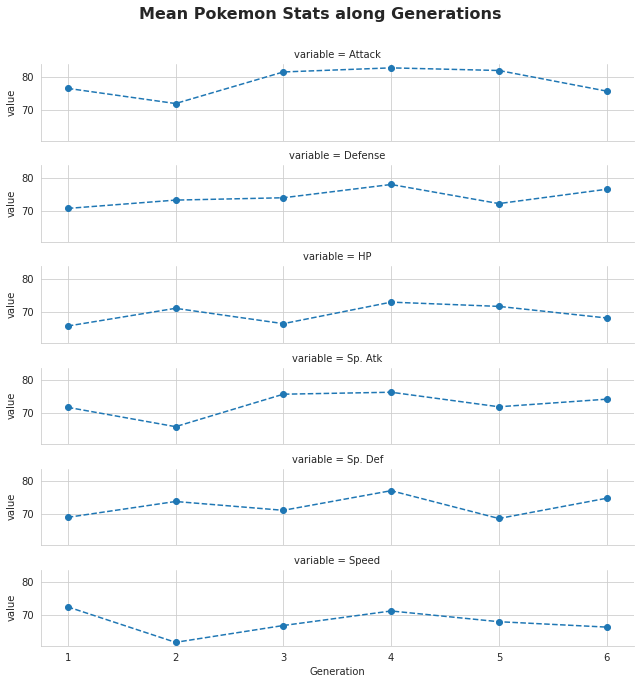

In [29]:
g = sns.FacetGrid(pkg_long, row="variable", size=1.5, aspect=6)
g = g.map(plt.plot, "Generation", "value", linestyle="dashed", marker="o")
g.fig.suptitle(
    "Mean Pokemon Stats along Generations", fontsize=16, weight="bold", y=1.05
)

Se puede observar que la mayoría de las estadísticas aumentaron para la generación 4 y hay una disminución hacia la 6ta generación. Esto puede definir un "arco" en la saga.

Para simplificarlo, podemos reducir todas estas estadísticas a un único valor, llamémoslo `Total_Power`, veamos como ha evolucionado a lo largo de las distintas generaciones.

In [30]:
pkg["Total_Power"] = pkg.sum(axis=1)

Considerando que los creadores de la serie tienen dos formas de introducir especies llamativas, ya sea por su poder o por el número de pokemons legendarios, revisemos también el número de legendarios introducidos a lo largo de las generaciones.

Text(0.5, 1.05, 'Mean Pokemon Stats along Generations')

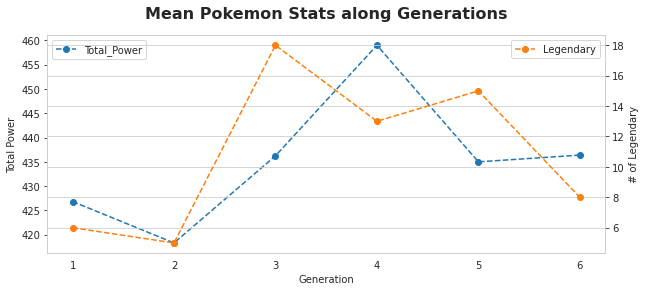

In [31]:
ax1 = pkg.Total_Power.plot(kind="line", linestyle="dashed", marker="o", figsize=(10, 4))
pkg["Legendary"] = pokemon.groupby("Generation")[["Legendary"]].sum()
ax2 = pkg.Legendary.plot(
    kind="line", linestyle="dashed", marker="o", secondary_y=True, ax=ax1
)
ax1.set_ylabel("Total Power")
ax2.set_ylabel("# of Legendary")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
ax1.set_title(
    "Mean Pokemon Stats along Generations", fontsize=16, weight="bold", y=1.05
)

Podemos ver como para añadir interés en la serie se ha intercambiado el énfasis en la introducción de especies de Pokemon poderosas con la introducción de especies de Pokemon tipo Legendario.

Este gráfico además es un ejemplo de como superponer gráficos con distintos ejes $Y$ mediante la opción `secondary_y=True`, y cómo manejar los gráficos independientemente mediante los objetos `Axes`: `ax1` y `ax2`.

### Conexiones y Relaciones

Vamos a revisar como podemos generar gráficos que expresen relaciones entre variables cuantitativas. Siendo el más utilizado el diagrama de *dispersión* (scatter en inglés). Simplemente se especifica el tipo de gráfico `kind='scatter'`, y las variables correspondientes a cada eje.

Como ejemplo inicial revisemos la relación entre el nivel de ataque y el nivel de defensa para todas las especies de Pokemon conocidas.

Text(0.5, 1.0, 'Attack vs Defense for every known Pokemon species')

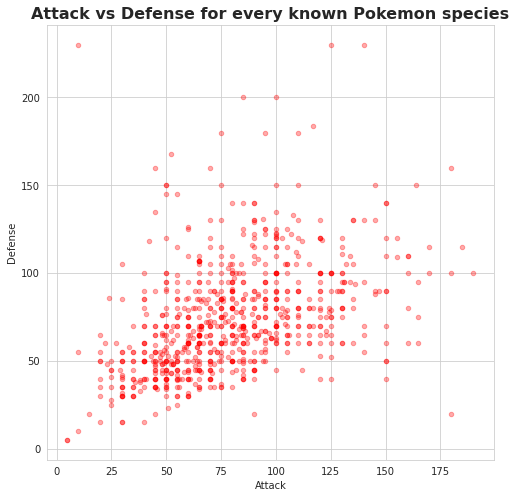

In [32]:
ax = pokemon.plot(
    kind="scatter", x="Attack", y="Defense", alpha=0.33, color="red", figsize=(8, 8)
)
ax.set_xlabel("Attack")
ax.set_ylabel("Defense")
ax.set_title(
    "Attack vs Defense for every known Pokemon species", fontsize=16, weight="bold"
)

> Nótese como es posible utilizar el objeto `plt` (alias de `Matplotlib.Pyplot`) para introducir las configuraciones globales del gráfico. Como hay una gran densidad de puntos se configuran con transparencia para distinguir mejor los patrones de valores más frecuentes.

Es fácil ver que en general los pokemons con mayor ataque también tienen mayor defensa. Los pokemon se hacen más poderosos de forma integral. Hay unos pocos pokemon especializados, como uno con muy alta defensa y poco ataque y otro caso a la inversa.

In [33]:
pokemon[(pokemon.Attack < 25) & (pokemon.Defense > 200)]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False


In [34]:
pokemon[(pokemon.Attack > 175) & (pokemon.Defense < 50)]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
430,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,3,True


¡Vamos a ponerlos como anotaciones sobre el gráfico!

Text(-100, 0, 'DeoxysAttack\nForme')

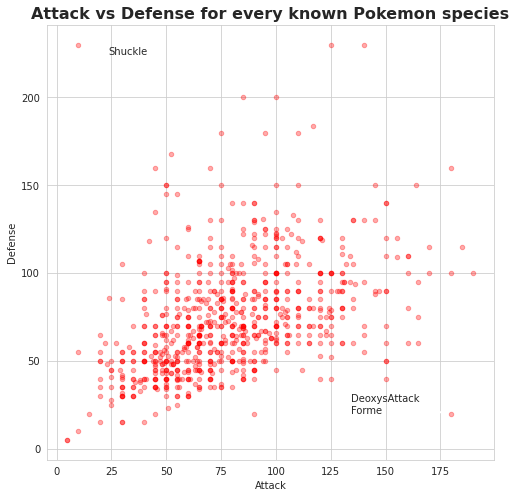

In [35]:
ax = pokemon.plot(
    kind="scatter", x="Attack", y="Defense", alpha=0.33, color="red", figsize=(8, 8)
)
ax.set_xlabel("Attack")
ax.set_ylabel("Defense")
ax.set_title(
    "Attack vs Defense for every known Pokemon species", fontsize=16, weight="bold"
)
pk1 = pokemon[(pokemon.Attack < 25) & (pokemon.Defense > 200)]
ax.annotate(
    pk1.Name.iloc[0],
    xy=(pk1.Attack, pk1.Defense),
    xycoords="data",
    xytext=(30, -10),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", lw=2),
)
pk2 = pokemon[(pokemon.Attack > 175) & (pokemon.Defense < 50)]
ax.annotate(
    "\n".join(pk2.Name.iloc[0].split()),
    xy=(pk2.Attack, pk2.Defense),
    xycoords="data",
    xytext=(-100, 0),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", lw=2),
)

Mediante Seaborn podemos generar con facilidad diagramas de dispersión con modelos de ajuste. Veamos un ejemplo utilizando el método `regplot()` (gráfico de regresión). 

Text(0.5, 1.0, 'Attack vs Speed for every known Pokemon species\n+  Regression Line')

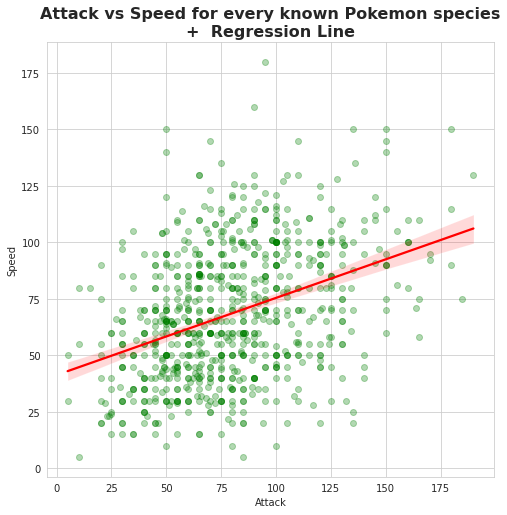

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.regplot(
    x="Attack",
    y="Speed",
    data=pokemon,
    scatter_kws={"color": "green", "alpha": 0.3},
    line_kws={"color": "red"},
)
ax.set_title(
    "Attack vs Speed for every known Pokemon species\n+  Regression Line",
    fontsize=16,
    weight="bold",
)

> El parámetro `scatter_kws` (scatter keywords) aplica a las propiedades de los puntos de la dispersión, y `line_kws` (line keywords) se utiliza para introducir parámetros específicos para la línea del ajuste.

También el crecimiento del Ataque viene acompañado con un incremento en la Velocidad.

Seaborn cuenta con una buena cantidad de gráficos predefinidos sumamente útiles y atractivos para el análisis estadístico. Uno de estos es `jointplot()`.

Text(0.5, 1.05, 'Defense vs Speed joinplot\nfor every known Pokemon species')

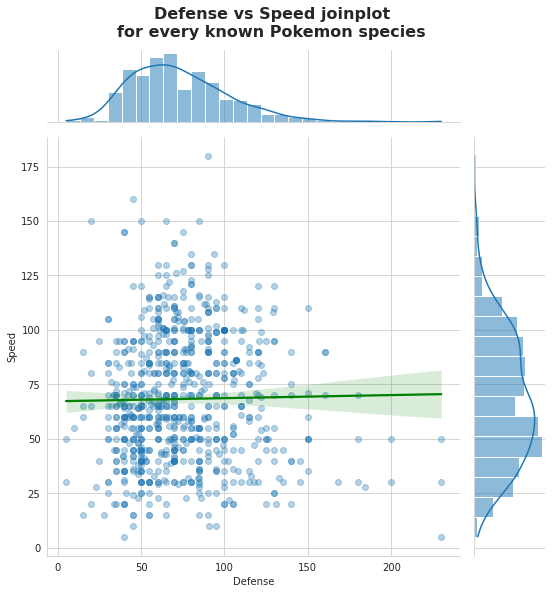

In [37]:
g = sns.jointplot(
    x="Defense",
    y="Speed",
    data=pokemon,
    kind="reg",
    line_kws={"color": "green"},
    scatter_kws={"alpha": 0.33},
)
g.fig.set_size_inches(8, 8)
g.fig.suptitle(
    "Defense vs Speed joinplot\nfor every known Pokemon species",
    fontsize=16,
    weight="bold",
    y=1.05,
)

Si bien en general, en nuestro conjunto de datos, el crecimiento de una de las variables implica crecimiento de las otras, lo que se conoce como *correlación positiva*. En el caso de "Defense", un aumento de esta implica un incremento muy reducido de "Speed", lo cual tiene sentido porque mejorar la defensa requiere del uso de armaduras y otros dispositivos pesados. Esto nos habla del esfuerzo que han puesto los diseñadores del juego para darle coherencia y equilibrio.

El gráfico ofrece una vista conveniente de la distribución de las variables en cada eje, y muestra valor del coeficiente de regresión de Pearson `pearsonr` $= 0.015$ y el nivel de significancia $p = 0.67$, lo que indica que este coeficiente es despreciable.

Un gráfico equivalente basado en hexágonos es más adecuado para apreciar la distribución de los valores.

Text(0.5, 1.05, 'Defense vs Speed hexagon joinplot\nfor every known Pokemon species')

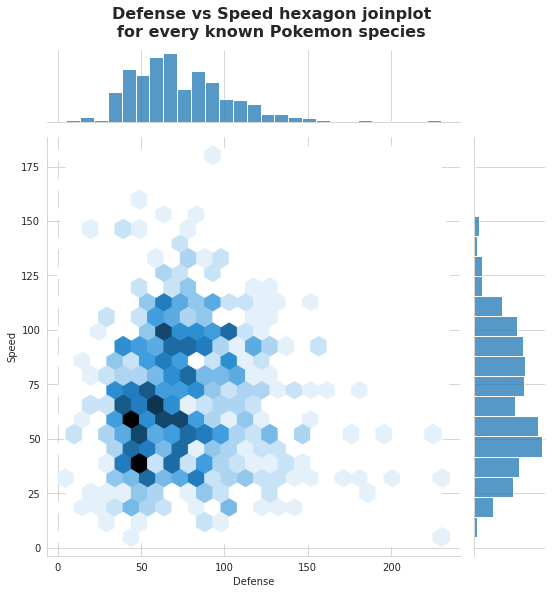

In [38]:
g = sns.jointplot(x="Defense", y="Speed", data=pokemon, kind="hex")
g.fig.set_size_inches(8, 8)
g.fig.suptitle(
    "Defense vs Speed hexagon joinplot\nfor every known Pokemon species",
    fontsize=16,
    weight="bold",
    y=1.05,
)

Para relacionar variables numéricas con categóricas podemos utilizar otro tipo de gráficos como el de caja. Por ejemplo, para comparar el poder total entre Pokemon legendarios y no legendarios.

In [39]:
pokemon["Total_Power"] = pokemon.iloc[:,range(3, 9)].sum(axis=1)
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_Power
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309


El siguiente es un ejemplo utilizando MatPlotlib a través de Pandas.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, 'Legendary vs non Legendary Total Power')

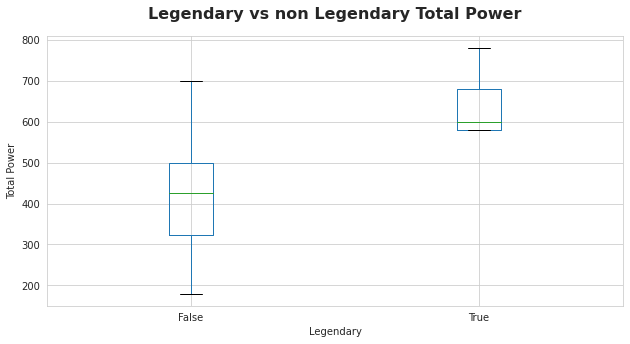

In [40]:
ax = pokemon.boxplot(column="Total_Power", by="Legendary", figsize=(10, 5))
ax.set_ylabel("Total Power")
ax.get_figure().gca().set_title("")
plt.suptitle("Legendary vs non Legendary Total Power", fontsize=16, weight="bold")

Todos los Pokemon legendarios están muy por encima de la media, ¡ya lo sabíamos!

Una comparación similar entre generaciones, pero utilizando Seaborn.

Text(0.5, 1.0, 'Total Power boxplot by Generations')

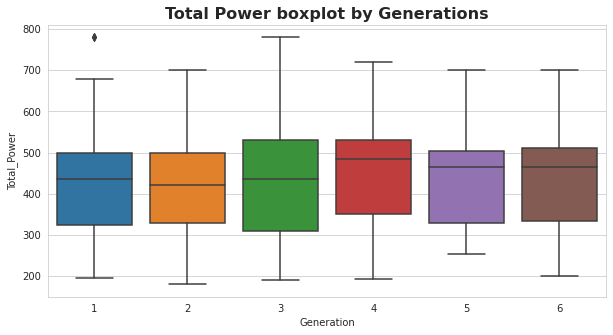

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.boxplot(x="Generation", y="Total_Power", data=pokemon)
ax.set_title("Total Power boxplot by Generations", fontsize=16, weight="bold")

En general hay bastante equilibrio entre las distintas generaciones, siendo la 3era generación la más variada y la 4ta con los Pokemon más poderosos en promedio.

## Relación con los resultados de los combates

Jugando con los datos podríamos estudiar varias hipótesis. Por ejemplo, decir que los pokemon que atacan primero tienen mayor probabilidad de ganar. Parece tener sentido, ya que se tiene oportunidad de disminuir antes los Hit Points. Veamos:

Text(0.5, 1.0, 'Battle winners count by first attacker order')

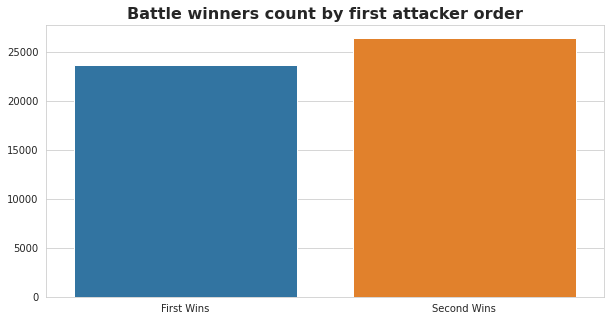

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
first_win = sum(combats.First_pokemon == combats.Winner)
second_win = sum(combats.Second_pokemon == combats.Winner)
sns.barplot(x=["First Wins", "Second Wins"], y=[first_win, second_win])
ax.set_title("Battle winners count by first attacker order", fontsize=16, weight="bold")

Encontramos que la hipótesis no se corrobora con la evidencia. De hecho, parece ser al contrario. Esto podría explicarse por el carácter estratégico del juego, el segundo jugador tiene oportunidad de ver "con qué viene" su atacante.

Vamos a convertir los datos de los combates en una tasa de victorias para luego relacionarla con las estadísticas de los Pokemon.

In [42]:
first_combats = combats["First_pokemon"].value_counts().sort_index()
second_combats = combats["Second_pokemon"].value_counts().sort_index()
winner_combats = combats["Winner"].value_counts().sort_index()
winner_combats = winner_combats.reindex(first_combats.index, fill_value=0)
battle_stats = pd.concat([first_combats, second_combats, winner_combats], axis=1)
battle_stats["total_combats"] = total_combats = first_combats + second_combats
battle_stats["win_pct"] = winner_combats / total_combats
battle_stats.head()

pokemon["win_pct"] = battle_stats.win_pct
pokemon.head()


,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_Power,win_pct
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,0.278195
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,0.380165
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,0.674242
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,0.560000
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309,0.491071


In [ ]:
pokemon["win_pct"] = battle_stats.win_pct
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_Power,win_pct
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,0.278195
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,0.380165
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,0.674242
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,0.560000
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309,0.491071


Veamos, ¿qué relación hay entre el poder total y el porcentaje de victorias?

Text(0.5, 1.05, 'Total Power vs Winning Percentage joinplot\nfor every known Pokemon species')

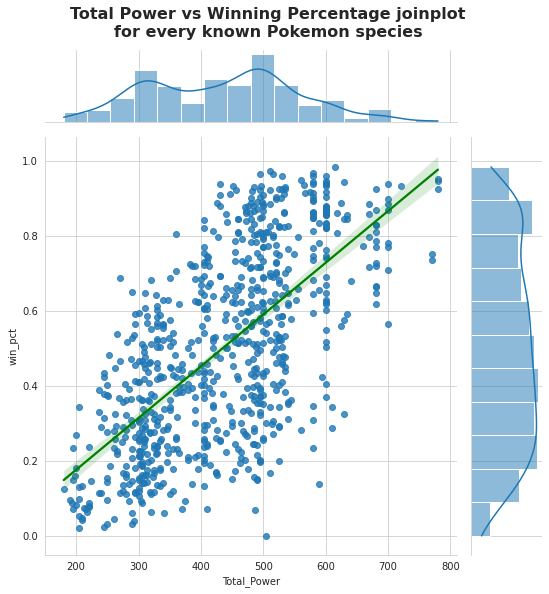

In [43]:
g = sns.jointplot(
    x="Total_Power", y="win_pct", data=pokemon, kind="reg", line_kws={"color": "green"}
)
g.fig.set_size_inches(8, 8)
g.fig.suptitle(
    "Total Power vs Winning Percentage joinplot\nfor every known Pokemon species",
    fontsize=16,
    weight="bold",
    y=1.05,
)

Como era previsible, los Pokemon más poderosos tienden a ganar más. Sin embargo, la correlación y la variabilidad en el gráfico muestran que hay bastantes casos que se escapan de la norma. Vale la pena hilar más fino.

Una forma de investigar rápidamente la relación cruzada entre todas las variables de un conjunto de datos es un gráfico "de parejas" o `pairplot()`. Dado que es un gráfico estadístico sofísticado es de esperar encontrarlo en un paquete como Seaborn.

Text(0.5, 0.95, 'Winning Percentage vs Pokemon Stats pairgrid\nfor every known Pokemon species')

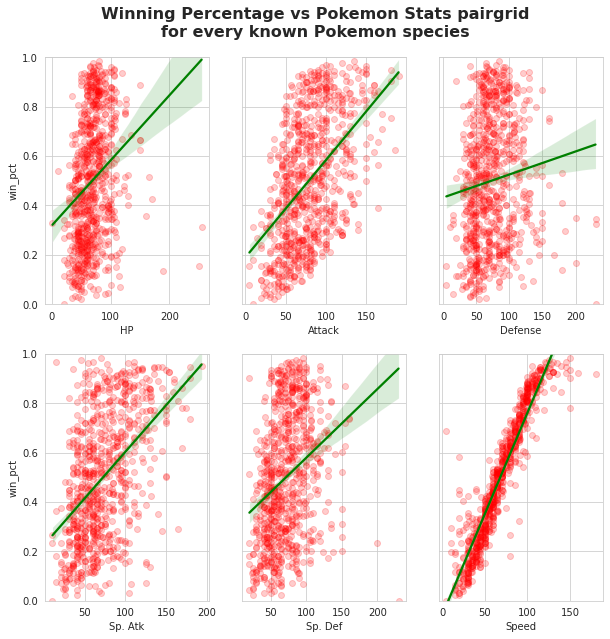

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(10, 10))

for i, col in enumerate(pokemon.columns[3:9]):
    ax = axes[i // 3, i % 3]
    sns.regplot(
        data=pokemon,
        ax=ax,
        y="win_pct",
        x=col,
        line_kws={"color": "g"},
        scatter_kws={"alpha": 0.2, "color": "r"},
    )
    if i % 3 > 0:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    ax.set_ylim((0, 1))
fig.suptitle(
    "Winning Percentage vs Pokemon Stats pairgrid\nfor every known Pokemon species",
    fontsize=16,
    weight="bold",
    y=0.95,
)

Este gráfico muestra que los factores más influyentes en la victoria son la Velocidad, el Ataque y la Velocidad de Ataque. Pero en particular la Velocidad es de lejos el factor más determinante, en la medida que aumenta la velocidad del Pokemon el porcentaje de victorias aumenta prácticamente en la misma proporción.

Quizás con un mapa de calor podemos ver esta información más fácilmente y con mayor detalle.

Text(0.5, 1, 'Pokemon Mean Stats and Wining Ratio\nCorrelation Heatmap')

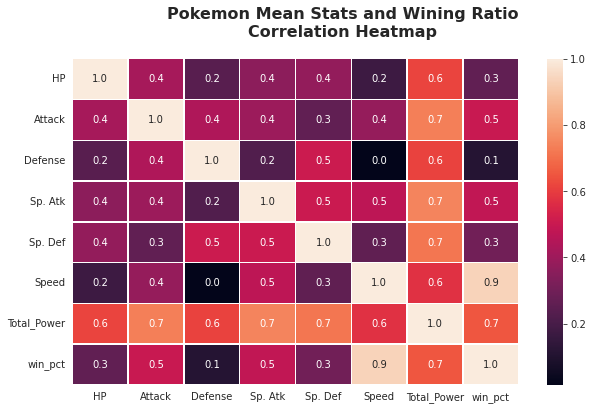

In [45]:
f, ax = plt.subplots(figsize=(10, 6))
g = sns.heatmap(
    pokemon[
        [
            "HP",
            "Attack",
            "Defense",
            "Sp. Atk",
            "Sp. Def",
            "Speed",
            "Total_Power",
            "win_pct",
        ]
    ].corr(),
    annot=True,
    linewidths=0.5,
    fmt=".1f",
    ax=ax,
)
plt.suptitle(
    "Pokemon Mean Stats and Wining Ratio\nCorrelation Heatmap",
    fontsize=16,
    weight="bold",
    y=1,
)

En este mapa de calor se verifica que la Velocidad es con mucho el factor más determinante en la tasa de victorias de los pokemons. La correlación de 0.9 indica que un aumento en la Velocidad implica un aumento proporcional directo determinante en las probabilidades de victoria.

Este gráfico muestra de una forma muy concisa y útil las relaciones entre todas las magnitudes de interés en nuestro conjunto de datos.

Finalmente, veamos como utilizar un gráfico de tipo `swarmplot()` para tener una visión general de como se distribuye el porcentaje de victorias de las especies para los distintos tipos de Pokemon.

Text(0.5, 0.92, 'Winning Percentage Distribution by Main Pokemon Type')

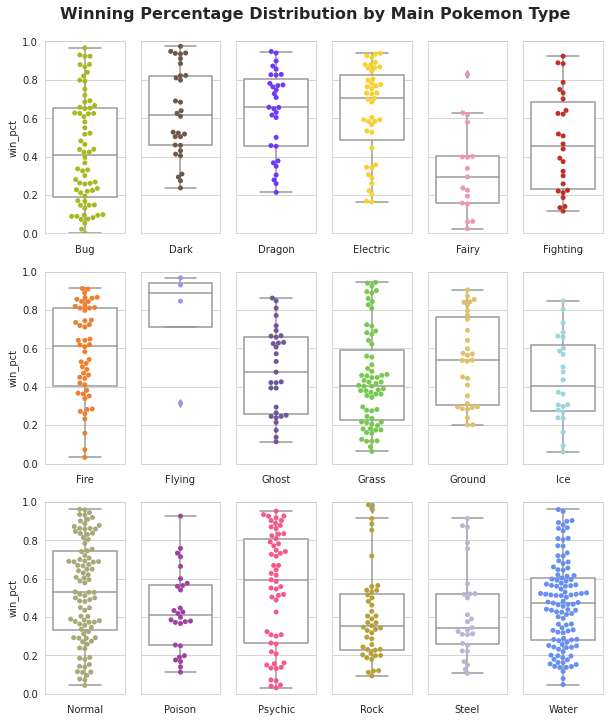

In [46]:
fig, axes = plt.subplots(3, 6, figsize=(10, 12))
pkt_win = pokemon[["Type 1", "win_pct"]]
pkt_win = pkt_win.sort_values("Type 1")

grouped = pkt_win.groupby("Type 1")
for i, (key, group) in enumerate(grouped):
    ax = axes[i // 6, i % 6]
    sns.boxplot(x="Type 1", y="win_pct", color="white", data=group, ax=ax)
    sns.swarmplot(y="win_pct", color=pk_colors[i], data=group, ax=ax)
    if i % 6 > 0:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    ax.set_xlabel(key)
    ax.set_ylim((0, 1))

plt.suptitle(
    "Winning Percentage Distribution by Main Pokemon Type",
    fontsize=16,
    weight="bold",
    y=0.92,
)

En este gráfico final podemos ver la distribución del Porcentaje Ganador Promedio para cada especie de Pokemon clasificado por Tipo. Se puede observar como los Pokemons muy númerosos tienen una distribución más o menos uniforme a lo largo de todo el rango. Hay tipos de Pokemon especialmente "perdedores" como Hada, Roca y Acero, y otros Pokemon "ganadores" como Volador, Dragón y Eléctrico.

Llama la atención que siendo los Pokemon de tipo Hada entre los últimos que se han introducido a la franquicia sean los más perdedores, sería de esperar que fuesen más atractivos. De todos modos, no tenemos información de las circunstancias en las que fueron adquiridos los datos.

Como curiosidad final podemos hacer una consulta sobre cuáles son los pokemon más ganadores:

In [ ]:
pokemon[pokemon.win_pct >= 0.95]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_Power,win_pct
#,,,,,,,,,,,,,
20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,495,0.966387
154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,515,0.964539
155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,615,0.984496
165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,780,0.952000
350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,False,560,0.950000
477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False,580,0.961240
513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,510,0.974790
704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True,580,0.968000
717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,600,0.959350


Como se ha dicho antes, ya que no conocemos las condiciones ni los métodos con los que se recogieron los datos de los combates es difícil llegar a conclusiones. Sin embargo, uno esperaría que entre los Pokemon más ganadores hubiesen más Legendarios, o hubiese al menos uno de tipo Eléctrico o Dragón. Sabemos que las batallas Pokemon son estratégicamente complejas, depende de la selección de los ataques y de la interacción entre los tipos de Pokemon entre otros factores.

## Observaciones Finales

En este Cuaderno de Jupyter se trabajó en la visualización en base a los datos del desafío de Kaggle: Pokemon's - Weedle's Cave. Se siguieron las pautas básicas de un análisis exploratorio de datos que sirvieran como ejemplo, sin dar muchas explicaciones, sobre cuales son los tipos de gráficos más convenientes según determinados propósitos.

Igualmente, sin explicar todos los detalles, se muestran ejemplos de codificación que contienen muchos tips y elementos útiles para los que empiecen a trabajar con la visualización en Python.

* Se dan varios ejemplos del manejo de una paleta de colores cualitativa que debe mantenerse relacionada correctamente aunque se alteren el orden o se filtren los datos originales.

* Igualmente se muestran varios ejemplos de manipulaciones de índices, tablas pivote, conversión a formato largo y agrupamiento de datos sobre `DataFrames` de Pandas.

* Se muestran ejemplos de la graficación directa con Matplotlib, del uso de Matplotlib a través de Pandas y de Seaborn como una interfaz de Matplotlib de alto nivel.

* Se muestran ejemplos de la generación de gráficos multivariantes por facetas, utilizando las estructuras manuales de Matplotlib, la forma de alto nivel que ofrece Seaborn mediante funciones como `facetgrid()`, habiendo hacia el final un ejemplo de combinación de estas dos estrategias.

* Aunque la códificación no es del todo coherente, ni se pretendía una gran optimización, hay aquí y allá ejemplos que se consideran valiosos para cuestiones como manejo de títulos y etiquetas en los ejes. También analizando las diferencias en que se implementan estas personalizaciones es posible comprender mejor la relación jerárquica entre los componentes de Matplotlib y Seaborn.

Hay muchas otras herramientas de graficación en Python. En especial, no se incluyeron las herramientas para la generación de gráficos interactivos. De todas maneras, estas herramientas son las fundamentales y es relativamente sencillo extrapolar lo visto a alternativas como [mpld3](http://mpld3.github.io/) que  siguiendo la misma filosofía permite generar gráficos para D3.js, y también para otras herramientas que han sido influenciadas por Matplotlib como Bokeh o Plotly.

No puedo trabajar con Matplotlib sin recordarme de [John Hunter](https://www.numfocus.org/programs/john-hunter-technology-fellowship/)